In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score  
from sklearn.metrics import confusion_matrix

In [21]:
df = pd.read_parquet(r"C:\Users\ISAIAS_QUINTERO\Desktop\Trabajo Practica\datos_vectorizados.parquet")
df.head()

,Sexos,Grupos,abajo,abajome,abajoperdi,abandon,abandonadayo,abandonado,abandonadoexprés,abandonadotrato,...,zoplicona,zoraido,zoster,zozobra,zuly,zumbido,zñiga,ás,él,és
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07274,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [22]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 19862 entries, Sexos to és
dtypes: float64(19860), int32(2)
memory usage: 757.6 MB


In [23]:
X = df.drop(columns=['Grupos'])
Y = df['Grupos']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3500, 19861), (1500, 19861), (3500,), (1500,))

In [24]:
LR = LogisticRegression()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

c:\Users\ISAIAS_QUINTERO\Desktop\Trabajo Practica\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6526666666666666
Precision: 0.6717537591181164
Recall: 0.6526666666666666
F1 Score: 0.638413874475738
Confusion Matrix:
 [[213  21   4  22   4  61]
 [ 27 240   0   4   5 100]
 [ 29   6  35  13   1  34]
 [ 18   5   0 101   0  26]
 [ 10  18   0   5  13  30]
 [ 35  33   0  10   0 377]]


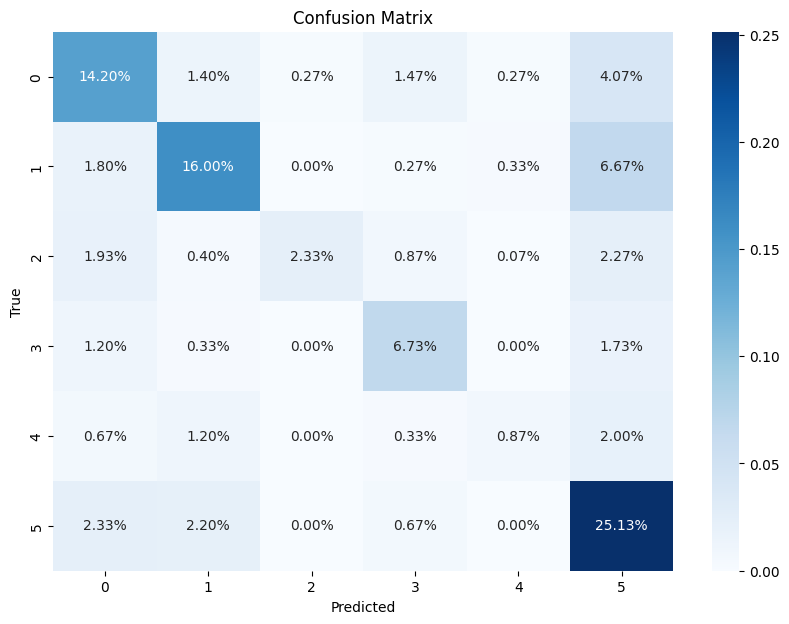

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))

ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', xticklabels=LR.classes_, yticklabels=LR.classes_)
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()